In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data=load_iris()

In [2]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df = df .astype(float)

In [3]:
df['y']=data.target
df['y']=df.y.replace(dict(enumerate(data.target_names)))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
Y=pd.get_dummies(df['y'],prefix='Y')
Y

,Y_setosa,Y_versicolor,Y_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [5]:
df=pd.concat([df,Y],axis=1)#dataframe 연결
df.drop(['y'],axis=1,inplace=True)#드롭할때 필수요건

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y_setosa,Y_versicolor,Y_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [7]:
X_data=df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
X_data=np.asarray(X_data) # 넘파이 어레이 자동으로 맞춰주는 역할
Y_data=df[['Y_setosa','Y_versicolor','Y_virginica']]
Y_data=np.asarray(Y_data)

In [8]:
X_data.shape,Y_data.shape

((150, 4), (150, 3))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
m=Sequential()
m.add(Dense(64,input_shape=(4,),activation='relu'))#1층
m.add(Dense(128,activation='relu'))
m.add(Dense(128,activation='relu'))
m.add(Dense(64,activation='relu'))
m.add(Dense(64,activation='relu'))
m.add(Dense(3,activation='softmax'))
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 37,763
Trainable params: 37,763
Non-trainable params: 0
____________________________________________________

In [10]:
t_x,tt_x,t_y,tt_y=train_test_split(X_data,Y_data,test_size=0.2,random_state=1)

In [11]:
t_x.shape

(120, 4)

In [12]:
m.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hy=m.fit(t_x,t_y,validation_split=0.2,batch_size=40,epochs=1000,verbose=2)#verbose=2 게이지 빼고 값만나옴

Epoch 1/1000
3/3 - 1s - loss: 1.0906 - accuracy: 0.5417 - val_loss: 1.0304 - val_accuracy: 0.2500
Epoch 2/1000
3/3 - 0s - loss: 0.9793 - accuracy: 0.3958 - val_loss: 1.0062 - val_accuracy: 0.2500
Epoch 3/1000
3/3 - 0s - loss: 0.9070 - accuracy: 0.4792 - val_loss: 0.9932 - val_accuracy: 0.5417
Epoch 4/1000
3/3 - 0s - loss: 0.8392 - accuracy: 0.7292 - val_loss: 0.9614 - val_accuracy: 0.5417
Epoch 5/1000
3/3 - 0s - loss: 0.7629 - accuracy: 0.7292 - val_loss: 0.8503 - val_accuracy: 0.5417
Epoch 6/1000
3/3 - 0s - loss: 0.6678 - accuracy: 0.7292 - val_loss: 0.6966 - val_accuracy: 0.5417
Epoch 7/1000
3/3 - 0s - loss: 0.5739 - accuracy: 0.7292 - val_loss: 0.6094 - val_accuracy: 0.5417
Epoch 8/1000
3/3 - 0s - loss: 0.4986 - accuracy: 0.7292 - val_loss: 0.5623 - val_accuracy: 0.5417
Epoch 9/1000
3/3 - 0s - loss: 0.4375 - accuracy: 0.7292 - val_loss: 0.4856 - val_accuracy: 0.8333
Epoch 10/1000
3/3 - 0s - loss: 0.3955 - accuracy: 0.9167 - val_loss: 0.4299 - val_accuracy: 0.9167
Epoch 11/1000
3/3 -

Epoch 84/1000
3/3 - 0s - loss: 0.0532 - accuracy: 0.9792 - val_loss: 0.1648 - val_accuracy: 0.9167
Epoch 85/1000
3/3 - 0s - loss: 0.0482 - accuracy: 0.9896 - val_loss: 0.1577 - val_accuracy: 0.8750
Epoch 86/1000
3/3 - 0s - loss: 0.0470 - accuracy: 0.9896 - val_loss: 0.1514 - val_accuracy: 0.8750
Epoch 87/1000
3/3 - 0s - loss: 0.0472 - accuracy: 0.9896 - val_loss: 0.1515 - val_accuracy: 0.8333
Epoch 88/1000
3/3 - 0s - loss: 0.0526 - accuracy: 0.9792 - val_loss: 0.1520 - val_accuracy: 0.8333
Epoch 89/1000
3/3 - 0s - loss: 0.0492 - accuracy: 0.9792 - val_loss: 0.1539 - val_accuracy: 0.8750
Epoch 90/1000
3/3 - 0s - loss: 0.0569 - accuracy: 0.9792 - val_loss: 0.1569 - val_accuracy: 0.8750
Epoch 91/1000
3/3 - 0s - loss: 0.0515 - accuracy: 0.9792 - val_loss: 0.1542 - val_accuracy: 0.8750
Epoch 92/1000
3/3 - 0s - loss: 0.0476 - accuracy: 0.9792 - val_loss: 0.2222 - val_accuracy: 0.9167
Epoch 93/1000
3/3 - 0s - loss: 0.0531 - accuracy: 0.9688 - val_loss: 0.1579 - val_accuracy: 0.8750
Epoch 94/1

Epoch 167/1000
3/3 - 0s - loss: 0.0403 - accuracy: 0.9792 - val_loss: 0.3435 - val_accuracy: 0.8750
Epoch 168/1000
3/3 - 0s - loss: 0.0340 - accuracy: 0.9896 - val_loss: 0.3094 - val_accuracy: 0.9167
Epoch 169/1000
3/3 - 0s - loss: 0.0493 - accuracy: 0.9792 - val_loss: 0.3483 - val_accuracy: 0.8750
Epoch 170/1000
3/3 - 0s - loss: 0.0748 - accuracy: 0.9688 - val_loss: 0.3930 - val_accuracy: 0.8750
Epoch 171/1000
3/3 - 0s - loss: 0.0398 - accuracy: 0.9896 - val_loss: 0.2267 - val_accuracy: 0.8333
Epoch 172/1000
3/3 - 0s - loss: 0.0575 - accuracy: 0.9792 - val_loss: 0.2526 - val_accuracy: 0.8333
Epoch 173/1000
3/3 - 0s - loss: 0.0453 - accuracy: 0.9896 - val_loss: 0.5276 - val_accuracy: 0.8333
Epoch 174/1000
3/3 - 0s - loss: 0.0556 - accuracy: 0.9688 - val_loss: 0.2518 - val_accuracy: 0.8333
Epoch 175/1000
3/3 - 0s - loss: 0.0423 - accuracy: 0.9792 - val_loss: 0.2691 - val_accuracy: 0.8333
Epoch 176/1000
3/3 - 0s - loss: 0.0431 - accuracy: 0.9896 - val_loss: 0.3834 - val_accuracy: 0.8750


Epoch 249/1000
3/3 - 0s - loss: 0.0303 - accuracy: 0.9896 - val_loss: 0.3820 - val_accuracy: 0.8750
Epoch 250/1000
3/3 - 0s - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.3399 - val_accuracy: 0.8750
Epoch 251/1000
3/3 - 0s - loss: 0.0260 - accuracy: 0.9896 - val_loss: 0.4883 - val_accuracy: 0.8750
Epoch 252/1000
3/3 - 0s - loss: 0.0346 - accuracy: 0.9896 - val_loss: 0.4754 - val_accuracy: 0.8750
Epoch 253/1000
3/3 - 0s - loss: 0.0274 - accuracy: 1.0000 - val_loss: 0.3136 - val_accuracy: 0.8750
Epoch 254/1000
3/3 - 0s - loss: 0.0329 - accuracy: 0.9792 - val_loss: 0.3060 - val_accuracy: 0.8333
Epoch 255/1000
3/3 - 0s - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.4161 - val_accuracy: 0.8750
Epoch 256/1000
3/3 - 0s - loss: 0.0329 - accuracy: 0.9792 - val_loss: 0.5102 - val_accuracy: 0.8750
Epoch 257/1000
3/3 - 0s - loss: 0.0248 - accuracy: 0.9896 - val_loss: 0.3211 - val_accuracy: 0.8333
Epoch 258/1000
3/3 - 0s - loss: 0.0426 - accuracy: 0.9792 - val_loss: 0.3100 - val_accuracy: 0.8333


Epoch 331/1000
3/3 - 0s - loss: 0.0318 - accuracy: 0.9792 - val_loss: 0.3101 - val_accuracy: 0.8333
Epoch 332/1000
3/3 - 0s - loss: 0.0389 - accuracy: 0.9792 - val_loss: 0.3408 - val_accuracy: 0.8750
Epoch 333/1000
3/3 - 0s - loss: 0.0249 - accuracy: 0.9896 - val_loss: 0.5286 - val_accuracy: 0.8750
Epoch 334/1000
3/3 - 0s - loss: 0.0318 - accuracy: 1.0000 - val_loss: 0.5674 - val_accuracy: 0.8750
Epoch 335/1000
3/3 - 0s - loss: 0.0283 - accuracy: 1.0000 - val_loss: 0.4137 - val_accuracy: 0.8333
Epoch 336/1000
3/3 - 0s - loss: 0.0253 - accuracy: 0.9896 - val_loss: 0.3478 - val_accuracy: 0.8333
Epoch 337/1000
3/3 - 0s - loss: 0.0359 - accuracy: 0.9792 - val_loss: 0.3904 - val_accuracy: 0.8333
Epoch 338/1000
3/3 - 0s - loss: 0.0270 - accuracy: 0.9896 - val_loss: 0.5512 - val_accuracy: 0.8750
Epoch 339/1000
3/3 - 0s - loss: 0.0375 - accuracy: 0.9896 - val_loss: 0.7076 - val_accuracy: 0.8333
Epoch 340/1000
3/3 - 0s - loss: 0.0664 - accuracy: 0.9688 - val_loss: 0.3453 - val_accuracy: 0.8333


Epoch 413/1000
3/3 - 0s - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.8153 - val_accuracy: 0.8750
Epoch 414/1000
3/3 - 0s - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.7767 - val_accuracy: 0.8333
Epoch 415/1000
3/3 - 0s - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.7820 - val_accuracy: 0.8333
Epoch 416/1000
3/3 - 0s - loss: 0.0162 - accuracy: 0.9896 - val_loss: 0.8340 - val_accuracy: 0.8750
Epoch 417/1000
3/3 - 0s - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.9045 - val_accuracy: 0.8333
Epoch 418/1000
3/3 - 0s - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.8353 - val_accuracy: 0.8333
Epoch 419/1000
3/3 - 0s - loss: 0.0222 - accuracy: 0.9896 - val_loss: 0.8561 - val_accuracy: 0.8333
Epoch 420/1000
3/3 - 0s - loss: 0.0259 - accuracy: 1.0000 - val_loss: 0.9306 - val_accuracy: 0.8333
Epoch 421/1000
3/3 - 0s - loss: 0.0168 - accuracy: 0.9896 - val_loss: 0.6462 - val_accuracy: 0.7917
Epoch 422/1000
3/3 - 0s - loss: 0.0389 - accuracy: 0.9792 - val_loss: 0.8174 - val_accuracy: 0.8333


Epoch 495/1000
3/3 - 0s - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.6523 - val_accuracy: 0.8750
Epoch 496/1000
3/3 - 0s - loss: 0.0185 - accuracy: 0.9896 - val_loss: 0.6817 - val_accuracy: 0.8750
Epoch 497/1000
3/3 - 0s - loss: 0.0269 - accuracy: 0.9896 - val_loss: 0.8021 - val_accuracy: 0.8750
Epoch 498/1000
3/3 - 0s - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.5422 - val_accuracy: 0.8750
Epoch 499/1000
3/3 - 0s - loss: 0.0319 - accuracy: 0.9792 - val_loss: 0.6091 - val_accuracy: 0.8750
Epoch 500/1000
3/3 - 0s - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.8571 - val_accuracy: 0.8333
Epoch 501/1000
3/3 - 0s - loss: 0.0220 - accuracy: 1.0000 - val_loss: 0.7547 - val_accuracy: 0.8750
Epoch 502/1000
3/3 - 0s - loss: 0.0203 - accuracy: 0.9896 - val_loss: 0.5379 - val_accuracy: 0.8750
Epoch 503/1000
3/3 - 0s - loss: 0.0413 - accuracy: 0.9792 - val_loss: 0.8199 - val_accuracy: 0.8750
Epoch 504/1000
3/3 - 0s - loss: 0.0406 - accuracy: 0.9896 - val_loss: 1.2722 - val_accuracy: 0.8333


Epoch 577/1000
3/3 - 0s - loss: 0.0094 - accuracy: 1.0000 - val_loss: 1.0697 - val_accuracy: 0.8750
Epoch 578/1000
3/3 - 0s - loss: 0.0081 - accuracy: 1.0000 - val_loss: 1.0507 - val_accuracy: 0.8750
Epoch 579/1000
3/3 - 0s - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.8974 - val_accuracy: 0.8750
Epoch 580/1000
3/3 - 0s - loss: 0.0111 - accuracy: 0.9896 - val_loss: 1.0349 - val_accuracy: 0.8750
Epoch 581/1000
3/3 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.2510 - val_accuracy: 0.8333
Epoch 582/1000
3/3 - 0s - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.0289 - val_accuracy: 0.8750
Epoch 583/1000
3/3 - 0s - loss: 0.0146 - accuracy: 0.9896 - val_loss: 0.9482 - val_accuracy: 0.8750
Epoch 584/1000
3/3 - 0s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.2290 - val_accuracy: 0.8333
Epoch 585/1000
3/3 - 0s - loss: 0.0330 - accuracy: 0.9688 - val_loss: 0.8503 - val_accuracy: 0.8333
Epoch 586/1000
3/3 - 0s - loss: 0.0828 - accuracy: 0.9792 - val_loss: 0.5781 - val_accuracy: 0.8750


Epoch 659/1000
3/3 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.4153 - val_accuracy: 0.8750
Epoch 660/1000
3/3 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.4075 - val_accuracy: 0.8750
Epoch 661/1000
3/3 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.4389 - val_accuracy: 0.8750
Epoch 662/1000
3/3 - 0s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.4895 - val_accuracy: 0.8333
Epoch 663/1000
3/3 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.4304 - val_accuracy: 0.8750
Epoch 664/1000
3/3 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.3511 - val_accuracy: 0.8750
Epoch 665/1000
3/3 - 0s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.4531 - val_accuracy: 0.8750
Epoch 666/1000
3/3 - 0s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.4970 - val_accuracy: 0.8750
Epoch 667/1000
3/3 - 0s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.4579 - val_accuracy: 0.8750
Epoch 668/1000
3/3 - 0s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.4900 - val_accuracy: 0.8750


Epoch 741/1000
3/3 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.8177 - val_accuracy: 0.8750
Epoch 742/1000
3/3 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.8026 - val_accuracy: 0.8750
Epoch 743/1000
3/3 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.4726 - val_accuracy: 0.8333
Epoch 744/1000
3/3 - 0s - loss: 0.0604 - accuracy: 0.9896 - val_loss: 2.0505 - val_accuracy: 0.8333
Epoch 745/1000
3/3 - 0s - loss: 0.1589 - accuracy: 0.9688 - val_loss: 1.2859 - val_accuracy: 0.7917
Epoch 746/1000
3/3 - 0s - loss: 0.2526 - accuracy: 0.9688 - val_loss: 1.6071 - val_accuracy: 0.7917
Epoch 747/1000
3/3 - 0s - loss: 0.5663 - accuracy: 0.9062 - val_loss: 0.4590 - val_accuracy: 0.9167
Epoch 748/1000
3/3 - 0s - loss: 0.1086 - accuracy: 0.9792 - val_loss: 1.3722 - val_accuracy: 0.8333
Epoch 749/1000
3/3 - 0s - loss: 0.2154 - accuracy: 0.9375 - val_loss: 0.6146 - val_accuracy: 0.8750
Epoch 750/1000
3/3 - 0s - loss: 0.0265 - accuracy: 0.9896 - val_loss: 0.2121 - val_accuracy: 0.8750


Epoch 823/1000
3/3 - 0s - loss: 0.0104 - accuracy: 1.0000 - val_loss: 1.1131 - val_accuracy: 0.8333
Epoch 824/1000
3/3 - 0s - loss: 0.0087 - accuracy: 1.0000 - val_loss: 1.0577 - val_accuracy: 0.8750
Epoch 825/1000
3/3 - 0s - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.9335 - val_accuracy: 0.8750
Epoch 826/1000
3/3 - 0s - loss: 0.0111 - accuracy: 1.0000 - val_loss: 1.0498 - val_accuracy: 0.8750
Epoch 827/1000
3/3 - 0s - loss: 0.0078 - accuracy: 1.0000 - val_loss: 1.1021 - val_accuracy: 0.8750
Epoch 828/1000
3/3 - 0s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.9926 - val_accuracy: 0.8750
Epoch 829/1000
3/3 - 0s - loss: 0.0129 - accuracy: 0.9896 - val_loss: 1.1282 - val_accuracy: 0.8750
Epoch 830/1000
3/3 - 0s - loss: 0.0165 - accuracy: 1.0000 - val_loss: 1.2408 - val_accuracy: 0.8333
Epoch 831/1000
3/3 - 0s - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.9308 - val_accuracy: 0.8333
Epoch 832/1000
3/3 - 0s - loss: 0.0309 - accuracy: 0.9792 - val_loss: 1.1536 - val_accuracy: 0.8750


Epoch 905/1000
3/3 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.4137 - val_accuracy: 0.8750
Epoch 906/1000
3/3 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.4231 - val_accuracy: 0.8750
Epoch 907/1000
3/3 - 0s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.4087 - val_accuracy: 0.8333
Epoch 908/1000
3/3 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.4094 - val_accuracy: 0.8333
Epoch 909/1000
3/3 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.4362 - val_accuracy: 0.8750
Epoch 910/1000
3/3 - 0s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.4622 - val_accuracy: 0.8750
Epoch 911/1000
3/3 - 0s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.4889 - val_accuracy: 0.8750
Epoch 912/1000
3/3 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.4788 - val_accuracy: 0.8750
Epoch 913/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.4986 - val_accuracy: 0.8750
Epoch 914/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.4867 - val_accuracy: 0.8750


Epoch 986/1000
3/3 - 0s - loss: 6.3161e-04 - accuracy: 1.0000 - val_loss: 1.8785 - val_accuracy: 0.8750
Epoch 987/1000
3/3 - 0s - loss: 5.4249e-04 - accuracy: 1.0000 - val_loss: 1.8620 - val_accuracy: 0.8333
Epoch 988/1000
3/3 - 0s - loss: 5.1721e-04 - accuracy: 1.0000 - val_loss: 1.8665 - val_accuracy: 0.8333
Epoch 989/1000
3/3 - 0s - loss: 4.9640e-04 - accuracy: 1.0000 - val_loss: 1.8957 - val_accuracy: 0.8750
Epoch 990/1000
3/3 - 0s - loss: 5.1838e-04 - accuracy: 1.0000 - val_loss: 1.8974 - val_accuracy: 0.8750
Epoch 991/1000
3/3 - 0s - loss: 5.0129e-04 - accuracy: 1.0000 - val_loss: 1.8897 - val_accuracy: 0.8333
Epoch 992/1000
3/3 - 0s - loss: 4.8573e-04 - accuracy: 1.0000 - val_loss: 1.8776 - val_accuracy: 0.8333
Epoch 993/1000
3/3 - 0s - loss: 4.6916e-04 - accuracy: 1.0000 - val_loss: 1.8805 - val_accuracy: 0.8333
Epoch 994/1000
3/3 - 0s - loss: 4.6146e-04 - accuracy: 1.0000 - val_loss: 1.8871 - val_accuracy: 0.8333
Epoch 995/1000
3/3 - 0s - loss: 4.5109e-04 - accuracy: 1.0000 - 

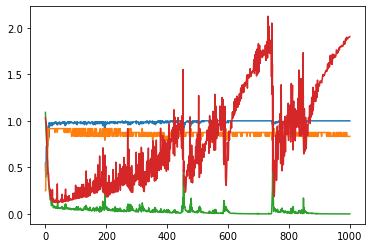

In [13]:
import matplotlib.pyplot as plt
plt.plot(hy.history['accuracy'])
plt.plot(hy.history['val_accuracy'])
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [14]:
m.evaluate(tt_x,tt_y)

1/1 [==============================] - 0s 16ms/step - loss: 0.6551 - accuracy: 0.9333


[0.6550976037979126, 0.9333333373069763]

In [15]:
from tensorflow.keras.initializers import RandomNormal, Constant # 평균연산
m2=Sequential()
m2.add(Dense(64,input_shape=(4,),activation='relu'))#1층
m2.add(BatchNormalization())
m2.add(Dense(128,activation='relu'))
m2.add(BatchNormalization())
m2.add(Dense(128,activation='relu'))
m2.add(BatchNormalization())
m2.add(Dense(64,activation='relu'))
m2.add(BatchNormalization())
m2.add(Dense(64,activation='relu'))
m2.add(BatchNormalization(momentum=0.95,epsilon=0.005
                          ,beta_initializer=RandomNormal(mean=0.0,stddev=0.05)
                          ,gamma_initializer=Constant(value=0.9)))#momentum=:전제적인 평균이나 표준편차 계산
m2.add(Dense(3,activation='softmax'))
m2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                320       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [16]:
m2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hy2=m2.fit(t_x,t_y,validation_split=0.2,batch_size=40,epochs=1000,verbose=2)#verbose=2 게이지 빼고 값만나옴

Epoch 1/1000
3/3 - 1s - loss: 0.7835 - accuracy: 0.6458 - val_loss: 1.2699 - val_accuracy: 0.2500
Epoch 2/1000
3/3 - 0s - loss: 0.2149 - accuracy: 0.9688 - val_loss: 1.2782 - val_accuracy: 0.2500
Epoch 3/1000
3/3 - 0s - loss: 0.1333 - accuracy: 0.9896 - val_loss: 1.2821 - val_accuracy: 0.2500
Epoch 4/1000
3/3 - 0s - loss: 0.0958 - accuracy: 0.9792 - val_loss: 1.2993 - val_accuracy: 0.2500
Epoch 5/1000
3/3 - 0s - loss: 0.0582 - accuracy: 0.9896 - val_loss: 1.3223 - val_accuracy: 0.2500
Epoch 6/1000
3/3 - 0s - loss: 0.1101 - accuracy: 0.9583 - val_loss: 1.3290 - val_accuracy: 0.2500
Epoch 7/1000
3/3 - 0s - loss: 0.0599 - accuracy: 0.9792 - val_loss: 1.3127 - val_accuracy: 0.2500
Epoch 8/1000
3/3 - 0s - loss: 0.0341 - accuracy: 0.9896 - val_loss: 1.2852 - val_accuracy: 0.2500
Epoch 9/1000
3/3 - 0s - loss: 0.0780 - accuracy: 0.9896 - val_loss: 1.2606 - val_accuracy: 0.2500
Epoch 10/1000
3/3 - 0s - loss: 0.0457 - accuracy: 0.9896 - val_loss: 1.2197 - val_accuracy: 0.2500
Epoch 11/1000
3/3 -

Epoch 84/1000
3/3 - 0s - loss: 0.0169 - accuracy: 1.0000 - val_loss: 1.4016 - val_accuracy: 0.3333
Epoch 85/1000
3/3 - 0s - loss: 0.0194 - accuracy: 0.9896 - val_loss: 1.2967 - val_accuracy: 0.3333
Epoch 86/1000
3/3 - 0s - loss: 0.0718 - accuracy: 0.9583 - val_loss: 1.1685 - val_accuracy: 0.3750
Epoch 87/1000
3/3 - 0s - loss: 0.0249 - accuracy: 0.9896 - val_loss: 1.1200 - val_accuracy: 0.5833
Epoch 88/1000
3/3 - 0s - loss: 0.0187 - accuracy: 0.9896 - val_loss: 1.0996 - val_accuracy: 0.6250
Epoch 89/1000
3/3 - 0s - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.0166 - val_accuracy: 0.6667
Epoch 90/1000
3/3 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.9592 - val_accuracy: 0.6667
Epoch 91/1000
3/3 - 0s - loss: 0.1135 - accuracy: 0.9792 - val_loss: 0.7767 - val_accuracy: 0.6667
Epoch 92/1000
3/3 - 0s - loss: 0.3776 - accuracy: 0.9375 - val_loss: 0.5017 - val_accuracy: 0.7917
Epoch 93/1000
3/3 - 0s - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.4539 - val_accuracy: 0.8333
Epoch 94/1

Epoch 166/1000
3/3 - 0s - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.3518 - val_accuracy: 0.8750
Epoch 167/1000
3/3 - 0s - loss: 0.0234 - accuracy: 0.9896 - val_loss: 0.3279 - val_accuracy: 0.9167
Epoch 168/1000
3/3 - 0s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.3195 - val_accuracy: 0.8750
Epoch 169/1000
3/3 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.3102 - val_accuracy: 0.8750
Epoch 170/1000
3/3 - 0s - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.2953 - val_accuracy: 0.8750
Epoch 171/1000
3/3 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.2800 - val_accuracy: 0.8750
Epoch 172/1000
3/3 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.2609 - val_accuracy: 0.9167
Epoch 173/1000
3/3 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2457 - val_accuracy: 0.9167
Epoch 174/1000
3/3 - 0s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.2343 - val_accuracy: 0.9167
Epoch 175/1000
3/3 - 0s - loss: 0.0167 - accuracy: 0.9896 - val_loss: 0.2551 - val_accuracy: 0.9167


Epoch 248/1000
3/3 - 0s - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.2551 - val_accuracy: 0.8750
Epoch 249/1000
3/3 - 0s - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.2595 - val_accuracy: 0.8750
Epoch 250/1000
3/3 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.2564 - val_accuracy: 0.8750
Epoch 251/1000
3/3 - 0s - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.2424 - val_accuracy: 0.8750
Epoch 252/1000
3/3 - 0s - loss: 0.0170 - accuracy: 0.9896 - val_loss: 0.2292 - val_accuracy: 0.8750
Epoch 253/1000
3/3 - 0s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.2094 - val_accuracy: 0.8750
Epoch 254/1000
3/3 - 0s - loss: 0.0263 - accuracy: 0.9896 - val_loss: 0.2079 - val_accuracy: 0.8750
Epoch 255/1000
3/3 - 0s - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.2605 - val_accuracy: 0.8750
Epoch 256/1000
3/3 - 0s - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.3243 - val_accuracy: 0.8750
Epoch 257/1000
3/3 - 0s - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.3804 - val_accuracy: 0.8333


Epoch 330/1000
3/3 - 0s - loss: 0.0203 - accuracy: 0.9896 - val_loss: 1.2708 - val_accuracy: 0.8750
Epoch 331/1000
3/3 - 0s - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.1876 - val_accuracy: 0.8750
Epoch 332/1000
3/3 - 0s - loss: 0.0187 - accuracy: 0.9896 - val_loss: 0.9206 - val_accuracy: 0.8750
Epoch 333/1000
3/3 - 0s - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.7188 - val_accuracy: 0.8750
Epoch 334/1000
3/3 - 0s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.5542 - val_accuracy: 0.8750
Epoch 335/1000
3/3 - 0s - loss: 0.0442 - accuracy: 0.9792 - val_loss: 0.4023 - val_accuracy: 0.8750
Epoch 336/1000
3/3 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.2162 - val_accuracy: 0.8333
Epoch 337/1000
3/3 - 0s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1671 - val_accuracy: 0.9167
Epoch 338/1000
3/3 - 0s - loss: 0.0140 - accuracy: 0.9896 - val_loss: 0.1788 - val_accuracy: 0.9167
Epoch 339/1000
3/3 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1975 - val_accuracy: 0.9167


Epoch 412/1000
3/3 - 0s - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.6567 - val_accuracy: 0.8750
Epoch 413/1000
3/3 - 0s - loss: 0.0161 - accuracy: 0.9896 - val_loss: 0.5973 - val_accuracy: 0.8750
Epoch 414/1000
3/3 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.5205 - val_accuracy: 0.9167
Epoch 415/1000
3/3 - 0s - loss: 0.0340 - accuracy: 0.9896 - val_loss: 0.4446 - val_accuracy: 0.9167
Epoch 416/1000
3/3 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.3818 - val_accuracy: 0.8750
Epoch 417/1000
3/3 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3697 - val_accuracy: 0.8750
Epoch 418/1000
3/3 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.3369 - val_accuracy: 0.8750
Epoch 419/1000
3/3 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.2836 - val_accuracy: 0.8750
Epoch 420/1000
3/3 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.2592 - val_accuracy: 0.8750
Epoch 421/1000
3/3 - 0s - loss: 0.0164 - accuracy: 0.9896 - val_loss: 0.2950 - val_accuracy: 0.9167


Epoch 494/1000
3/3 - 0s - loss: 0.0290 - accuracy: 0.9896 - val_loss: 0.1739 - val_accuracy: 0.9583
Epoch 495/1000
3/3 - 0s - loss: 0.0247 - accuracy: 0.9896 - val_loss: 0.1332 - val_accuracy: 0.9583
Epoch 496/1000
3/3 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1543 - val_accuracy: 0.8750
Epoch 497/1000
3/3 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2445 - val_accuracy: 0.8750
Epoch 498/1000
3/3 - 0s - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.3123 - val_accuracy: 0.8750
Epoch 499/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3304 - val_accuracy: 0.8750
Epoch 500/1000
3/3 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3392 - val_accuracy: 0.9167
Epoch 501/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3504 - val_accuracy: 0.9167
Epoch 502/1000
3/3 - 0s - loss: 0.0154 - accuracy: 0.9896 - val_loss: 0.4088 - val_accuracy: 0.8750
Epoch 503/1000
3/3 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.5381 - val_accuracy: 0.8750


Epoch 576/1000
3/3 - 0s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.1801 - val_accuracy: 0.9167
Epoch 577/1000
3/3 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1882 - val_accuracy: 0.9167
Epoch 578/1000
3/3 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1929 - val_accuracy: 0.9167
Epoch 579/1000
3/3 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1968 - val_accuracy: 0.9167
Epoch 580/1000
3/3 - 0s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2000 - val_accuracy: 0.9167
Epoch 581/1000
3/3 - 0s - loss: 8.7818e-04 - accuracy: 1.0000 - val_loss: 0.2062 - val_accuracy: 0.9167
Epoch 582/1000
3/3 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2078 - val_accuracy: 0.9167
Epoch 583/1000
3/3 - 0s - loss: 9.7851e-04 - accuracy: 1.0000 - val_loss: 0.1973 - val_accuracy: 0.9167
Epoch 584/1000
3/3 - 0s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.1911 - val_accuracy: 0.9167
Epoch 585/1000
3/3 - 0s - loss: 0.0240 - accuracy: 0.9896 - val_loss: 0.1766 - val_accuracy:

Epoch 658/1000
3/3 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.5444 - val_accuracy: 0.9167
Epoch 659/1000
3/3 - 0s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.6637 - val_accuracy: 0.9167
Epoch 660/1000
3/3 - 0s - loss: 0.0240 - accuracy: 0.9792 - val_loss: 0.6129 - val_accuracy: 0.9167
Epoch 661/1000
3/3 - 0s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.5820 - val_accuracy: 0.8750
Epoch 662/1000
3/3 - 0s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.5192 - val_accuracy: 0.8750
Epoch 663/1000
3/3 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.4462 - val_accuracy: 0.8750
Epoch 664/1000
3/3 - 0s - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.3927 - val_accuracy: 0.8750
Epoch 665/1000
3/3 - 0s - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.3824 - val_accuracy: 0.8750
Epoch 666/1000
3/3 - 0s - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.4027 - val_accuracy: 0.8750
Epoch 667/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4288 - val_accuracy: 0.8750


Epoch 740/1000
3/3 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1444 - val_accuracy: 0.9167
Epoch 741/1000
3/3 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1558 - val_accuracy: 0.9167
Epoch 742/1000
3/3 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1613 - val_accuracy: 0.9167
Epoch 743/1000
3/3 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.1681 - val_accuracy: 0.9167
Epoch 744/1000
3/3 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1745 - val_accuracy: 0.9167
Epoch 745/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1800 - val_accuracy: 0.9167
Epoch 746/1000
3/3 - 0s - loss: 0.0194 - accuracy: 0.9896 - val_loss: 0.1645 - val_accuracy: 0.9167
Epoch 747/1000
3/3 - 0s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.1064 - val_accuracy: 0.9167
Epoch 748/1000
3/3 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0571 - val_accuracy: 0.9583
Epoch 749/1000
3/3 - 0s - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0385 - val_accuracy: 1.0000


Epoch 822/1000
3/3 - 0s - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.8371 - val_accuracy: 0.9167
Epoch 823/1000
3/3 - 0s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.8849 - val_accuracy: 0.9167
Epoch 824/1000
3/3 - 0s - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.8850 - val_accuracy: 0.9167
Epoch 825/1000
3/3 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.8743 - val_accuracy: 0.9167
Epoch 826/1000
3/3 - 0s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.8584 - val_accuracy: 0.9167
Epoch 827/1000
3/3 - 0s - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.8123 - val_accuracy: 0.9167
Epoch 828/1000
3/3 - 0s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.7769 - val_accuracy: 0.9167
Epoch 829/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.7654 - val_accuracy: 0.9167
Epoch 830/1000
3/3 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.7525 - val_accuracy: 0.9167
Epoch 831/1000
3/3 - 0s - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.7050 - val_accuracy: 0.9167


Epoch 904/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3661 - val_accuracy: 0.8333
Epoch 905/1000
3/3 - 0s - loss: 7.1415e-04 - accuracy: 1.0000 - val_loss: 0.3635 - val_accuracy: 0.8333
Epoch 906/1000
3/3 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3590 - val_accuracy: 0.8333
Epoch 907/1000
3/3 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3575 - val_accuracy: 0.8333
Epoch 908/1000
3/3 - 0s - loss: 0.0250 - accuracy: 0.9896 - val_loss: 0.3819 - val_accuracy: 0.8333
Epoch 909/1000
3/3 - 0s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4681 - val_accuracy: 0.8750
Epoch 910/1000
3/3 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.5552 - val_accuracy: 0.8750
Epoch 911/1000
3/3 - 0s - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.6088 - val_accuracy: 0.8333
Epoch 912/1000
3/3 - 0s - loss: 0.0286 - accuracy: 0.9896 - val_loss: 0.5882 - val_accuracy: 0.7917
Epoch 913/1000
3/3 - 0s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.4748 - val_accuracy: 0.8

Epoch 986/1000
3/3 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3498 - val_accuracy: 0.8333
Epoch 987/1000
3/3 - 0s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3514 - val_accuracy: 0.8750
Epoch 988/1000
3/3 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3483 - val_accuracy: 0.8750
Epoch 989/1000
3/3 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.3425 - val_accuracy: 0.8333
Epoch 990/1000
3/3 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3387 - val_accuracy: 0.8333
Epoch 991/1000
3/3 - 0s - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.3294 - val_accuracy: 0.8333
Epoch 992/1000
3/3 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3585 - val_accuracy: 0.8333
Epoch 993/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4070 - val_accuracy: 0.8333
Epoch 994/1000
3/3 - 0s - loss: 0.0364 - accuracy: 0.9896 - val_loss: 0.4619 - val_accuracy: 0.8333
Epoch 995/1000
3/3 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.4068 - val_accuracy: 0.8333


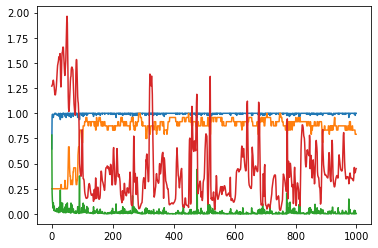

In [17]:
plt.plot(hy2.history['accuracy'])
plt.plot(hy2.history['val_accuracy'])
plt.plot(hy2.history['loss'])
plt.plot(hy2.history['val_loss'])

In [18]:
m2.evaluate(tt_x,tt_y)

1/1 [==============================] - 0s 15ms/step - loss: 0.3210 - accuracy: 0.8667


[0.3210029900074005, 0.8666666746139526]